<a href="https://colab.research.google.com/github/jcj217-mc/Data_205/blob/main/Copy_of_Data205_Project_DailyArrest_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [531]:
# import packages
import pandas as pd
import numpy as np
import os 
import json

In [532]:
# tab-separated data into pandas data frame.
df = pd.read_csv('Crime_Year_To_Date_-_2019.csv')
# this is the revised arrest dataset which does not have tiered crime types - will use previously downloaded csv

In [533]:
df.head()

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201224991,2303,190004823,1/31/19 0:00,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20600 BLK SENECA MEADOWS PKW,GERMANTOWN,MD,20876.0,MCPD,Grocery/Supermarket,M,5M1,701.0,20600.0,NaN,SENECA MEADOWS,NaN,PKW,1/31/19 0:00,NaN,39.198497,-77.256101,5D,"(39.1985, -77.2561)"
1,201224996,5404,190004825,1/31/19 1:00,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,MONTGOMERY VILLAGE,NaN,GAITHERSBURG,MD,20877.0,GPD,Street - In vehicle,P,6P3,419.0,NaN,E,DIAMOND,NaN,AVE,1/31/19 1:00,NaN,39.139127,-77.180281,6D,"(39.1391, -77.1803)"
2,201224993,5404,190004824,1/31/19 1:17,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,SILVER SPRING,NaN,SILVER SPRING,MD,20904.0,MCPD,Street - Other,I,3I1,151.0,NaN,NaN,NEW HAMPSHIRE,NaN,AVE,1/31/19 1:05,NaN,39.050660,-76.993305,3D,"(39.0507, -76.9933)"
3,201224995,1399,190004826,1/31/19 1:54,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,1100 BLK WEST SIDE DR,GAITHERSBURG,MD,20878.0,MCPD,Residence -Townhouse/Duplex,P,6P1,550.0,1100.0,NaN,WEST SIDE,NaN,DR,1/31/19 1:54,NaN,39.124450,-77.203323,6D,"(39.1245, -77.2033)"
4,201224995,9106,190004826,1/31/19 1:54,90Z,1,Other,All Other Offenses,MENTAL ILLNESS,MONTGOMERY VILLAGE,1100 BLK WEST SIDE DR,GAITHERSBURG,MD,20878.0,MCPD,Residence -Townhouse/Duplex,P,6P1,550.0,1100.0,NaN,WEST SIDE,NaN,DR,1/31/19 1:54,NaN,39.124450,-77.203323,6D,"(39.1245, -77.2033)"


In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90366 entries, 0 to 90365
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Incident ID             90366 non-null  int64  
 1   Offence Code            90366 non-null  int64  
 2   CR Number               90366 non-null  int64  
 3   Dispatch Date / Time    90366 non-null  object 
 4   NIBRS Code              90366 non-null  object 
 5   Victims                 90366 non-null  int64  
 6   Crime Name1             90230 non-null  object 
 7   Crime Name2             90230 non-null  object 
 8   Crime Name3             90230 non-null  object 
 9   Police District Name    90366 non-null  object 
 10  Block Address           82327 non-null  object 
 11  City                    89886 non-null  object 
 12  State                   90366 non-null  object 
 13  Zip Code                90355 non-null  float64
 14  Agency                  90366 non-null

In [535]:
# Setting to date time and making date the index
# df.index = pd.to_datetime(df.index, dayfirst=True)
# df.head()

In [536]:
df.describe()

,Incident ID,Offence Code,CR Number,Victims,Zip Code,PRA,Address Number,Latitude,Longitude
count,9.036600e+04,90366.000000,9.036600e+04,90366.000000,90355.000000,90333.000000,8.236200e+04,90366.000000,90366.000000
mean,2.012721e+08,4272.075460,1.956139e+08,1.023095,20877.005489,370.693988,8.378410e+03,38.983213,-76.922537
std,2.745720e+04,2860.022685,5.646916e+06,0.185062,34.102771,207.338193,1.668048e+04,1.948943,3.844305
min,2.012250e+08,301.000000,1.900048e+08,1.000000,20001.000000,1.000000,1.000000e+00,0.000000,-77.516753
25%,2.012472e+08,2305.000000,1.900323e+08,1.000000,20853.000000,189.000000,1.600000e+03,39.022084,-77.196526
50%,2.012739e+08,2610.000000,2.000024e+08,1.000000,20878.000000,370.000000,8.100000e+03,39.074972,-77.104467
75%,2.012960e+08,5404.000000,2.000288e+08,1.000000,20904.000000,519.000000,1.240000e+04,39.142200,-77.032272
max,2.013184e+08,9201.000000,2.100041e+08,8.000000,22181.000000,808.000000,2.090600e+06,39.342046,0.000000


In [537]:
df.shape

(90366, 30)

In [538]:
# make datetime - can also do it at dataframe level, put datetime in dictionary 
df['Dispatch Date / Time'] = pd.to_datetime(df['Dispatch Date / Time'])
df.head(1)

,Incident ID,Offence Code,CR Number,Dispatch Date / Time,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201224991,2303,190004823,2019-01-31,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20600 BLK SENECA MEADOWS PKW,GERMANTOWN,MD,20876.0,MCPD,Grocery/Supermarket,M,5M1,701.0,20600.0,NaN,SENECA MEADOWS,NaN,PKW,1/31/19 0:00,NaN,39.198497,-77.256101,5D,"(39.1985, -77.2561)"


In [539]:
df.rename(columns={'Dispatch Date / Time': 'Date'}, inplace=True)

In [540]:
df.head()

,Incident ID,Offence Code,CR Number,Date,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Street Prefix,Street Name,Street Suffix,Street Type,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201224991,2303,190004823,2019-01-31 00:00:00,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20600 BLK SENECA MEADOWS PKW,GERMANTOWN,MD,20876.0,MCPD,Grocery/Supermarket,M,5M1,701.0,20600.0,NaN,SENECA MEADOWS,NaN,PKW,1/31/19 0:00,NaN,39.198497,-77.256101,5D,"(39.1985, -77.2561)"
1,201224996,5404,190004825,2019-01-31 01:00:00,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,MONTGOMERY VILLAGE,NaN,GAITHERSBURG,MD,20877.0,GPD,Street - In vehicle,P,6P3,419.0,NaN,E,DIAMOND,NaN,AVE,1/31/19 1:00,NaN,39.139127,-77.180281,6D,"(39.1391, -77.1803)"
2,201224993,5404,190004824,2019-01-31 01:17:00,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,SILVER SPRING,NaN,SILVER SPRING,MD,20904.0,MCPD,Street - Other,I,3I1,151.0,NaN,NaN,NEW HAMPSHIRE,NaN,AVE,1/31/19 1:05,NaN,39.050660,-76.993305,3D,"(39.0507, -76.9933)"
3,201224995,1399,190004826,2019-01-31 01:54:00,13B,1,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE,MONTGOMERY VILLAGE,1100 BLK WEST SIDE DR,GAITHERSBURG,MD,20878.0,MCPD,Residence -Townhouse/Duplex,P,6P1,550.0,1100.0,NaN,WEST SIDE,NaN,DR,1/31/19 1:54,NaN,39.124450,-77.203323,6D,"(39.1245, -77.2033)"
4,201224995,9106,190004826,2019-01-31 01:54:00,90Z,1,Other,All Other Offenses,MENTAL ILLNESS,MONTGOMERY VILLAGE,1100 BLK WEST SIDE DR,GAITHERSBURG,MD,20878.0,MCPD,Residence -Townhouse/Duplex,P,6P1,550.0,1100.0,NaN,WEST SIDE,NaN,DR,1/31/19 1:54,NaN,39.124450,-77.203323,6D,"(39.1245, -77.2033)"


In [541]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90366 entries, 0 to 90365
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Incident ID             90366 non-null  int64         
 1   Offence Code            90366 non-null  int64         
 2   CR Number               90366 non-null  int64         
 3   Date                    90366 non-null  datetime64[ns]
 4   NIBRS Code              90366 non-null  object        
 5   Victims                 90366 non-null  int64         
 6   Crime Name1             90230 non-null  object        
 7   Crime Name2             90230 non-null  object        
 8   Crime Name3             90230 non-null  object        
 9   Police District Name    90366 non-null  object        
 10  Block Address           82327 non-null  object        
 11  City                    89886 non-null  object        
 12  State                   90366 non-null  object

In [542]:
# Drop street columns
df.drop(df.columns[[20,21,22,23]], axis=1, inplace=True)


In [543]:
df.head(1)

,Incident ID,Offence Code,CR Number,Date,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201224991,2303,190004823,2019-01-31,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20600 BLK SENECA MEADOWS PKW,GERMANTOWN,MD,20876.0,MCPD,Grocery/Supermarket,M,5M1,701.0,20600.0,1/31/19 0:00,NaN,39.198497,-77.256101,5D,"(39.1985, -77.2561)"


In [544]:
#del df['last_name']

In [545]:
df.head(1)

,Incident ID,Offence Code,CR Number,Date,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201224991,2303,190004823,2019-01-31,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20600 BLK SENECA MEADOWS PKW,GERMANTOWN,MD,20876.0,MCPD,Grocery/Supermarket,M,5M1,701.0,20600.0,1/31/19 0:00,NaN,39.198497,-77.256101,5D,"(39.1985, -77.2561)"


In [546]:
#del df['first_name']
#del df['middle_name']


In [547]:
df.head(1)

,Incident ID,Offence Code,CR Number,Date,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201224991,2303,190004823,2019-01-31,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20600 BLK SENECA MEADOWS PKW,GERMANTOWN,MD,20876.0,MCPD,Grocery/Supermarket,M,5M1,701.0,20600.0,1/31/19 0:00,NaN,39.198497,-77.256101,5D,"(39.1985, -77.2561)"


In [548]:
df_crime = df.iloc[ : , 6:9]
df_crime.head()

,Crime Name1,Crime Name2,Crime Name3
0,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING
1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR
2,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR
3,Crime Against Person,Simple Assault,ASSAULT - 2ND DEGREE
4,Other,All Other Offenses,MENTAL ILLNESS


In [549]:
df_prop = df_crime[(df_crime['Crime Name1'] == 'Crime Against Property')]
df_prop2 = pd.DataFrame(df_prop['Crime Name2'].value_counts())
df_prop2

,Crime Name2
Theft From Motor Vehicle,9217
Destruction/Damage/Vandalism of Property,5884
Shoplifting,5112
All other Larceny,4387
Theft from Building,3201
Identity Theft,2670
Burglary/Breaking and Entering,2665
False Pretenses/Swindle/Confidence Game,2168
Motor Vehicle Theft,2037
Theft of Motor Vehicle Parts or Accessories,1988


In [550]:
df_pers = df_crime[(df_crime['Crime Name1'] == 'Crime Against Person')]
df_pers2 = pd.DataFrame(df_pers['Crime Name2'].value_counts())
df_pers2

,Crime Name2
Simple Assault,6339
Aggravated Assault,1338
Forcible Rape,386
Fondling,257
Forcible Sodomy,185
Sexual Assault With An Object,121
Forcible Fondling,119
Intimidation,80
Murder and Nonnegligent Manslaughter,39
All Other Offenses,38


In [551]:
df_soc = df_crime[(df_crime['Crime Name1'] == 'Crime Against Society')]
df_soc2 = pd.DataFrame(df_soc['Crime Name2'].value_counts())
df_soc2

,Crime Name2
Drug/Narcotic Violations,5337
Driving Under the Influence,3738
All Other Offenses,2653
Liquor Law Violations,1546
Disorderly Conduct,1268
Trespass of Real Property,1146
Weapon Law Violations,579
Drug Equipment Violations,431
"Family Offenses, NonViolent",234
Pornography/Obscene Material,87


In [552]:
df_soc_other = df_soc[(df_soc['Crime Name2'] == 'All Other Offenses')]
df_soc_other2 = pd.DataFrame(df_soc_other['Crime Name3'].value_counts())
df_soc_other2

,Crime Name3
OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,466
PUBLIC PEACE - HARASSING COMMUNICATION,438
ALL OTHER OFFENSES,423
UNAUTHORIZED USE OF VEHICLE (INCLUDES JOY RIDING),303
OBSTRUCT POLICE - RESISTING OFFICER,240
SEX OFFENSE - INDECENT EXPOSURE,115
OBSTRUCT POLICE (DESCRIBE OFFENSE),107
OBSTRUCT POLICE - OBSTRUCT CRIMINAL INVEST,87
SEX OFFENSE - INDECENT EXPOSURE TO ADULT,87
FUGITIVE FROM MD JURISDICTION,73


In [553]:
df_other = df_crime[(df_crime['Crime Name1'] == 'Other')]
df_other2 = pd.DataFrame(df_other['Crime Name2'].value_counts())
df_other2

,Crime Name2
All Other Offenses,19181
Not Mapped,66
NOT NIBRS CODE,49


In [554]:
df_other_other = df_other[(df_crime['Crime Name2'] == 'All Other Offenses')]
df_other_other2 = pd.DataFrame(df_other_other['Crime Name3'].value_counts())
df_other_other2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,Crime Name3
POLICE INFORMATION,5523
MENTAL ILLNESS - EMERGENCY PETITION,4419
LOST PROPERTY,3201
SUDDEN DEATH,2154
MISSING PERSON,1428
RECOVERED PROPERTY - MONT CO.,690
RECOVERED PROPERTY - OTHER,461
OVERDOSE,322
SUICIDE - ATTEMPT,266
MENTAL ILLNESS,201


In [555]:
df_NAC = df_crime[(df_crime['Crime Name1'] == 'Not a Crime')]
df_NAC2 = pd.DataFrame(df_NAC['Crime Name2'].value_counts())
df_NAC2

,Crime Name2
Runaway,1099


In [556]:
# Type of Offense - Crime Name 1 sum
df_crime1 = pd.DataFrame(df['Crime Name1'].value_counts())
df_crime1

,Crime Name1
Crime Against Property,43794
Other,19296
Crime Against Society,17112
Crime Against Person,8929
Not a Crime,1099


In [557]:
# Renaming column
df_crime1.rename(columns={'Crime Name1': 'Count'}, inplace=True)

In [558]:
# Renaming index column
df_crime1.index.name = 'Crime'

In [559]:
df_crime1.head()

,Count
Crime,
Crime Against Property,43794
Other,19296
Crime Against Society,17112
Crime Against Person,8929
Not a Crime,1099


No handles with labels found to put in legend.


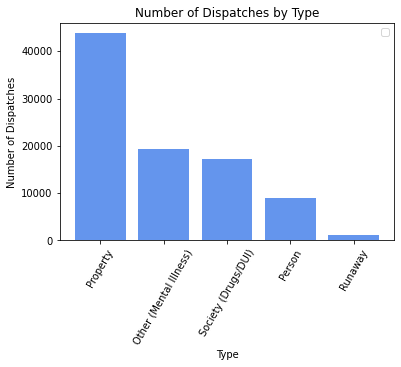

In [560]:
# Plotting Type of Offense - Crime Name 1
import matplotlib.pyplot as plt

ax = plt.axes()

labels = ['Property', 'Other', 'Society', 'Person', 'Not a Crime']

plt.bar(df_crime1.index,df_crime1.Count, color ='cornflowerblue')
plt.legend()
plt.xlabel('Type')
plt.ylabel('Number of Dispatches')

plt.xticks(rotation=60)
ax.set_xticklabels(['Property', 'Other (Mental Illness)', 'Society (Drugs/DUI)', 'Person', 'Runaway'])

plt.title('Number of Dispatches by Type')

plt.show()

In [561]:
import plotly.io as pio
pio.templates
import plotly.express as px


#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(x=df_crime1.index, y=df_crime1.Count, labels=dict(x="Type", y="Number of Dispatches"), title="Number of Dispatches by Type", template='plotly_white')
for idx in range(len(fig.data)):
    fig.data[idx].x = ['Property','Other (Mental Illness)','Society (Drugs/DUI)', 'Person', 'Runaway']

fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })
fig.update_traces(marker_color='cornflowerblue')
fig.show()


In [562]:
# Type of Offense - Crime Name 2 sum
df['Crime Name2'].value_counts()

All Other Offenses                             21913
Theft From Motor Vehicle                        9217
Simple Assault                                  6339
Destruction/Damage/Vandalism of Property        5884
Drug/Narcotic Violations                        5337
Shoplifting                                     5112
All other Larceny                               4387
Driving Under the Influence                     3738
Theft from Building                             3201
Identity Theft                                  2670
Burglary/Breaking and Entering                  2665
False Pretenses/Swindle/Confidence Game         2168
Motor Vehicle Theft                             2037
Theft of Motor Vehicle Parts or Accessories     1988
Liquor Law Violations                           1546
Credit Card/Automatic Teller Machine Fraud      1477
Aggravated Assault                              1338
Disorderly Conduct                              1268
Trespass of Real Property                     

In [563]:
df.head(1)

,Incident ID,Offence Code,CR Number,Date,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201224991,2303,190004823,2019-01-31,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20600 BLK SENECA MEADOWS PKW,GERMANTOWN,MD,20876.0,MCPD,Grocery/Supermarket,M,5M1,701.0,20600.0,1/31/19 0:00,NaN,39.198497,-77.256101,5D,"(39.1985, -77.2561)"


In [564]:
df_date = pd.DataFrame(df[['Crime Name1', 'Date']])
df_date

,Crime Name1,Date
0,Crime Against Property,2019-01-31 00:00:00
1,Crime Against Society,2019-01-31 01:00:00
2,Crime Against Society,2019-01-31 01:17:00
3,Crime Against Person,2019-01-31 01:54:00
4,Other,2019-01-31 01:54:00
...,...,...
90361,Crime Against Society,2021-02-01 19:41:00
90362,Crime Against Society,2021-02-01 20:36:00
90363,Crime Against Property,2021-02-01 21:11:00
90364,Crime Against Property,2021-02-01 21:45:00


In [565]:
df_date.rename(columns={'Crime Name1':'Crime'}, inplace=True)
df_date.head()

,Crime,Date
0,Crime Against Property,2019-01-31 00:00:00
1,Crime Against Society,2019-01-31 01:00:00
2,Crime Against Society,2019-01-31 01:17:00
3,Crime Against Person,2019-01-31 01:54:00
4,Other,2019-01-31 01:54:00


In [566]:
# Create separate columns for month day and year 
df_date.Date = pd.to_datetime(df_date.Date)

In [567]:
df_date[['Month', 'Year']] = df_date.Date.apply(lambda x: pd.Series(x.strftime("%m, %Y").split(",")))
df_date

,Crime,Date,Month,Year
0,Crime Against Property,2019-01-31 00:00:00,01,2019
1,Crime Against Society,2019-01-31 01:00:00,01,2019
2,Crime Against Society,2019-01-31 01:17:00,01,2019
3,Crime Against Person,2019-01-31 01:54:00,01,2019
4,Other,2019-01-31 01:54:00,01,2019
...,...,...,...,...
90361,Crime Against Society,2021-02-01 19:41:00,02,2021
90362,Crime Against Society,2021-02-01 20:36:00,02,2021
90363,Crime Against Property,2021-02-01 21:11:00,02,2021
90364,Crime Against Property,2021-02-01 21:45:00,02,2021


In [568]:
GB = df_date.groupby([(df_date.Year),(df_date.Month), (df_date.Crime)]).count()
GB

Date
Year  Month Crime                       
 2019 01    Crime Against Person      14
            Crime Against Property    64
            Crime Against Society     20
            Not a Crime                6
            Other                     28
...                                  ...
 2021 01    Other                    726
      02    Crime Against Person       2
            Crime Against Property    17
            Crime Against Society      4
            Other                     15

[129 rows x 1 columns]

In [569]:
GB3 = df_date.groupby([(df_date.Year)])
GB4 = pd.DataFrame(GB3.Crime.value_counts())
GB4

Crime
Year  Crime                        
 2019 Crime Against Property  19396
      Crime Against Society    9807
      Other                    9072
      Crime Against Person     4333
      Not a Crime               555
 2020 Crime Against Property  22571
      Other                    9483
      Crime Against Society    6941
      Crime Against Person     4286
      Not a Crime               514
 2021 Crime Against Property   1827
      Other                     741
      Crime Against Society     364
      Crime Against Person      310
      Not a Crime                30

In [570]:
GB4.rename(columns={'Crime':'Count'}, inplace=True)
GB4.head()

Count
Year  Crime                        
 2019 Crime Against Property  19396
      Crime Against Society    9807
      Other                    9072
      Crime Against Person     4333
      Not a Crime               555

In [571]:
GB4.reset_index(level=0, inplace=True)
GB4

,Year,Count
Crime,,
Crime Against Property,2019,19396
Crime Against Society,2019,9807
Other,2019,9072
Crime Against Person,2019,4333
Not a Crime,2019,555
Crime Against Property,2020,22571
Other,2020,9483
Crime Against Society,2020,6941
Crime Against Person,2020,4286


In [572]:
GB4.reset_index(level=0, inplace=True)
GB4

,Crime,Year,Count
0,Crime Against Property,2019,19396
1,Crime Against Society,2019,9807
2,Other,2019,9072
3,Crime Against Person,2019,4333
4,Not a Crime,2019,555
5,Crime Against Property,2020,22571
6,Other,2020,9483
7,Crime Against Society,2020,6941
8,Crime Against Person,2020,4286
9,Not a Crime,2020,514


In [573]:
person = GB4['Crime'] == "Crime Against Person"
property = GB4['Crime'] == "Crime Against Property"
society = GB4['Crime'] == "Crime Against Society"
NAC = GB4['Crime'] == "Not a Crime"
other = GB4['Crime'] == "Other"

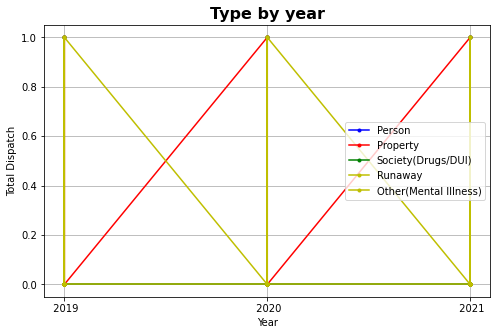

In [574]:
import matplotlib.pyplot as plt

#make plot larger
plt.figure(figsize = (8,5))

plt.title("Type by year", fontdict={'fontweight': 'bold', 'fontsize':16})

plt.plot(GB4.Year, person, 'b.-', label="Person")
plt.plot(GB4.Year, property,'r.-', label = 'Property')
plt.plot(GB4.Year, society, 'g.-', label = 'Society(Drugs/DUI)')
plt.plot(GB4.Year, NAC, 'y.-', label = 'Runaway')
plt.plot(GB4.Year, other, 'y.-', label = 'Other(Mental Illness)')


# for loop for many different countries plotted
# for country in gas:
# if country != 'Year':
    # plt.plot(gas.Year, gas[country], marker='.')

# Can vary above with
# countries_to_look_at = ['Australia', 'USA', 'Canada', 'South Korea']
# for countries in gas:
# if country in countries_to_look_out:
#   plt.plot(gas.Year, gas[country], marker='.')

#plt.xticks(GB4.Year[::3].tolist())

plt.xlabel('Year')
plt.ylabel('Total Dispatch')

plt.grid()

plt.legend()

#plt.savefig('Gas_price_figure.png', dpi=300)
# higher dpi higher resolution

plt.show()

In [575]:
import plotly.express as px
import plotly.graph_objects as go

fig = go.Figure()


fig = px.bar(GB4, x="Year", y="Count", color="Crime", barmode="group", title="Count of Dispatch Offense Type by Year")

fig.update_layout(
            title={
            'x':0.5,
            'xanchor': 'center'
        })
 

fig.show()


In [576]:
import plotly.express as px
fig = px.bar(GB4, x="Year", y="Count", color="Crime", barmode="group",facet_col="Crime")
fig.show()


In [577]:
df.head(1)

,Incident ID,Offence Code,CR Number,Date,NIBRS Code,Victims,Crime Name1,Crime Name2,Crime Name3,Police District Name,Block Address,City,State,Zip Code,Agency,Place,Sector,Beat,PRA,Address Number,Start_Date_Time,End_Date_Time,Latitude,Longitude,Police District Number,Location
0,201224991,2303,190004823,2019-01-31,23C,1,Crime Against Property,Shoplifting,LARCENY - SHOPLIFTING,GERMANTOWN,20600 BLK SENECA MEADOWS PKW,GERMANTOWN,MD,20876.0,MCPD,Grocery/Supermarket,M,5M1,701.0,20600.0,1/31/19 0:00,NaN,39.198497,-77.256101,5D,"(39.1985, -77.2561)"


Text(0, 0.5, 'Total')

<Figure size 720x432 with 0 Axes>

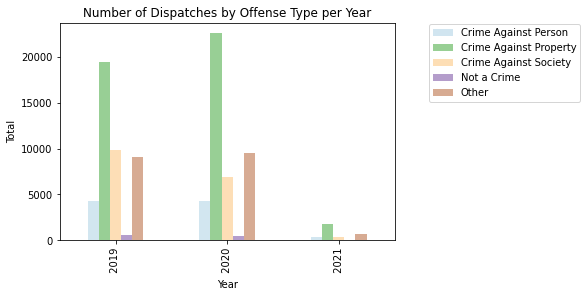

In [585]:
# Plotting Bar Chart Comparing the types of pre-trial supervision and detention
plt.figure(figsize=(10,6))
ax = GB4.groupby(['Year', 'Crime'])['Count'].mean().unstack().plot.bar(colormap='Paired', alpha = 0.5)
ax.set_facecolor('white')
ax.legend(bbox_to_anchor = [1.57, 1.018])

plt.title('Number of Dispatches by Offense Type per Year')
plt.xlabel('Year')
plt.ylabel('Total')

